In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
x_train =np.array([[0,0],[0,1],[1,0],[1,1]])
y_train =np.array([[0],[1],[1],[0]])
print(x_train)
print(y_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [23]:
# Crear el modelo
modelo = Sequential()
#modelo.add(Dense(1, input_shape=(2,), activation='tanh'))  # Usar la función directamente
modelo.add(Dense(3, input_shape=(2,), activation='tanh'))
modelo.add(Dense(6, activation='tanh'))
modelo.add(Dense(1, activation='sigmoid'))
modelo.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

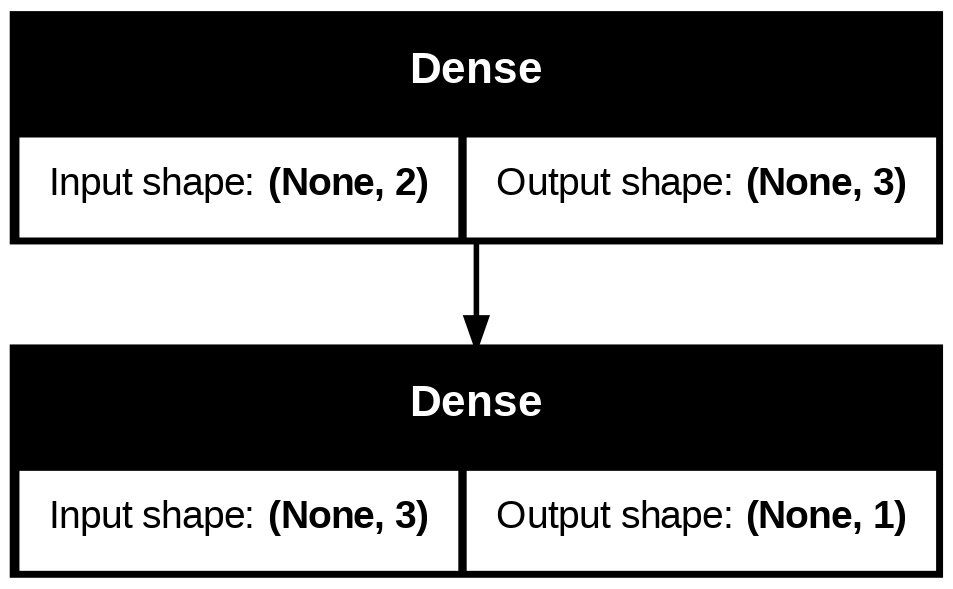

In [ ]:
keras.utils.plot_model(modelo, "RNA_XOR.png", show_shapes=True)

In [ ]:
modelo.compile('rmsprop','mse',metrics=['accuracy','mse'])
historia=modelo.fit(x_train,y_train,epochs=5000,verbose=1)
y_predic=modelo.predict(x_train)
print(y_predic)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 3.8246e-05 - mse: 3.8246e-05
Epoch 2504/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 3.8206e-05 - mse: 3.8206e-05
Epoch 2505/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 3.8165e-05 - mse: 3.8165e-05
Epoch 2506/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.8124e-05 - mse: 3.8124e-05
Epoch 2507/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 3.8084e-05 - mse: 3.8084e-05
Epoch 2508/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 3.8043e-05 - mse: 3.8043e-05
Epoch 2509/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.8003e-05 - mse: 3.8003e-05
Epoch 2510/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 3.7962e-05 - mse: 3.7962e-05
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 3.79

In [ ]:
modelo.evaluate(x_train,y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step - accuracy: 1.0000 - loss: 1.0013e-05 - mse: 1.0013e-05


[1.001285454549361e-05, 1.0, 1.001285454549361e-05]

Visualización de la evolucion de la pérdida y de la precisión

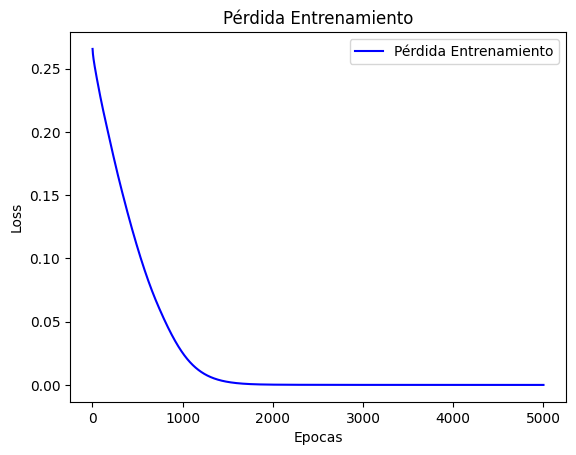

In [ ]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)
plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
hidden1 = modelo.layers[0]


In [ ]:
weightsco, biasesco = hidden1.get_weights()
print(weightsco)
print(biasesco)

[[-1.4968086  1.6762857 -1.3735269]
 [-1.6263193  1.3214222 -1.6043108]]
[ 2.159929  -2.056418   2.0421903]


In [ ]:
CapaSalida = modelo.layers[1]


In [ ]:
weightscs, biasescs = CapaSalida.get_weights()
print(weightscs)
print(biasescs)

[[-3.2912955]
 [ 2.7919896]
 [-2.487835 ]]
[-1.17805]
